In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data_set = sklearn.datasets.load_breast_cancer()

In [3]:
df = pd.DataFrame(data_set.data, columns=data_set.feature_names)

In [4]:
df['label'] = data_set.target

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.shape

(569, 31)

In [8]:
df['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [9]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [10]:
X = df.drop(columns='label', axis=1)
Y = df['label']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [12]:
print(X_train.shape, X_test.shape, X.shape)

(455, 30) (114, 30) (569, 30)


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [14]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [15]:
model = keras.Sequential([keras.layers.Flatten(input_shape =(30,)), 
                        keras.layers.Dense(20,activation='relu'),
                        keras.layers.Dense(2,activation='sigmoid')])

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(X_train_std,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 24ms/step - loss: 0.5303 - accuracy: 0.7897 - val_loss: 0.4316 - val_accuracy: 0.8478
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.3896 - accuracy: 0.8729 - val_loss: 0.3186 - val_accuracy: 0.8913
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2984 - accuracy: 0.9218 - val_loss: 0.2487 - val_accuracy: 0.9348
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2431 - accuracy: 0.9364 - val_loss: 0.2034 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2047 - accuracy: 0.9438 - val_loss: 0.1727 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1779 - accuracy: 0.9560 - val_loss: 0.1517 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1578 - accuracy: 0.9584 - val_loss: 0.1360 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

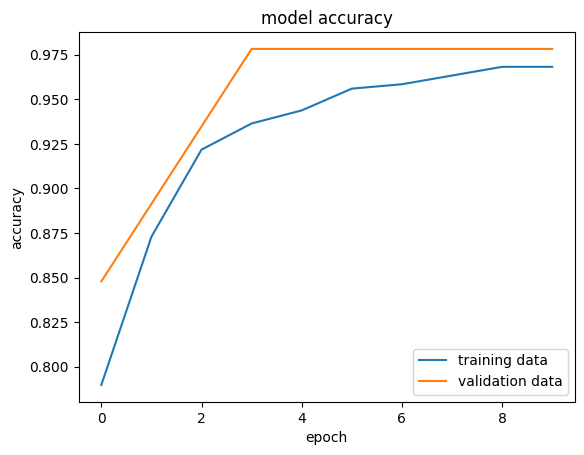

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

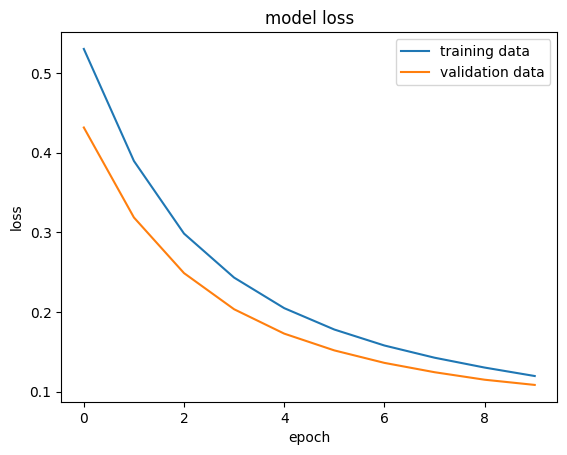

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [20]:
loss, accuracy = model.evaluate(X_test_std,Y_test)
accuracy

4/4 [==============================] - 0s 3ms/step - loss: 0.1172 - accuracy: 0.9649


0.9649122953414917

In [21]:
Y_pred = model.predict(X_test_std)
Y_pred[0]

4/4 [==============================] - 0s 2ms/step


array([0.21597438, 0.45495418], dtype=float32)

In [22]:
Y_pred_labels = [np.argmax(i) for i in Y_pred] #this will return index of max value in the list
Y_pred_labels

[1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0]

Building the Predictive System

In [27]:
input_data=(8.196,16.84,51.71,201.9,0.086,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.01646,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409)
ip_array = np.asarray(input_data)

reshaped_data = ip_array.reshape(1,-1)
ip_data_std = scaler.transform(reshaped_data)

prediction = model.predict(ip_data_std)
# print(prediction)

prediction_label = [np.argmax(prediction)]
# print(prediction_label)

if(prediction_label[0]==0):
    print('Melignant')
else:
    print("Benign")

1/1 [==============================] - 0s 35ms/step
Benign


C:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
